In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [40]:
data = pd.read_csv("Movie_regression.csv")

In [41]:
data.head(10)

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400
5,20.5970,59.36,0.542,35718.650,132.2,6.890,7.100,6.885,7.005,7.26,498425,YES,143.48,284.592,Comedy,53,460,57400
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,YES,139.16,243.664,Thriller,41,522,45800
7,22.8910,70.74,0.476,34285.460,169.6,6.980,7.075,6.875,7.170,7.96,400821,NO,116.84,243.536,Drama,56,571,44200
8,24.2248,70.74,0.476,31280.205,173.5,6.910,7.075,6.850,7.000,7.96,295168,YES,118.60,242.640,Comedy,55,564,33000
9,23.4008,70.74,0.476,33352.220,159.4,6.665,6.725,6.575,6.855,7.96,412012,YES,189.56,283.024,Thriller,45,508,37800


### DESCRIPTION FOR THE ABOVE COLUMNS

MARKETING EXPENSE : Advertising.Development of advertising and other promotions (in CRORES)

PRODUCTION EXPNSE: Production costs can include a variety of expenses, such as labor, raw materials, consumable                                manufacturing supplies, and general overhead.

MULTIPLEX COVERAGE : A multiplex is a movie theater complex with multiple screens within a single complex

BUDGET : Expenditure for the movie (In CRORES)

MOVIE LENGTH : in mins

ACTOR RATING : RATING FOR THE ACTOR BY IMDB (1 to 10 scale)

ACTRESS RATING : RATING FOR THE ACTRESS BY IMDB (1 to 10 scale)

DIRECTOR RATING : RATING FOR THE DIRECTOR BY IMDB (1 to 10 scale)

CRITIC RATING : critic reviews


Trailer_views: View for trailer (lakhs)

3D_available : The movie is 3d or not

Twitter_hastags : Number of hastags in twitter (Support, popularity) 

Genre : Comdey, action ,thriller,drama

Avg_age_actors : NO of Actors acting in the movie

Collection : Collection for the movie

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [43]:
# from above we can see time take has missing values, so imputing missing values with mean value of time taken

In [44]:
data["Time_taken"].mean()

157.39149797570855

In [45]:
data["Time_taken"].fillna(value=data["Time_taken"].mean(),inplace=True)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [47]:
# changing budget value to crores

data["Budget"] = data["Budget"]/100
data["Collection"] = data["Collection"]/100


In [48]:
data.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,365.24125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,480.0
1,20.5462,69.14,0.531,356.68655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,432.0
2,20.5458,69.14,0.531,399.12675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,694.0
3,20.6474,59.36,0.542,388.73890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,668.0
4,21.3810,59.36,0.542,397.01585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,724.0


DATA VISUALIZATION

<AxesSubplot:xlabel='Genre', ylabel='count'>

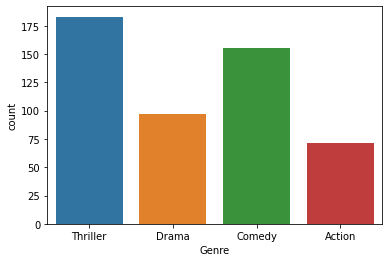

In [49]:
sns.countplot(x = "Genre",data = data)

<AxesSubplot:xlabel='3D_available', ylabel='count'>

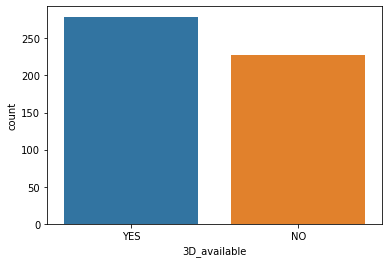

In [50]:
sns.countplot(x = "3D_available", data = data)

Text(0.5, 1.0, 'Collection Vs Actor Rating')

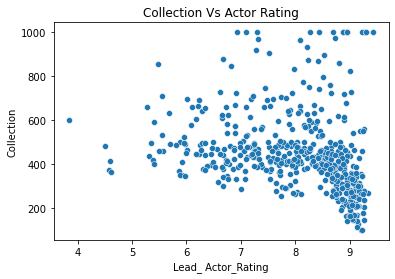

In [51]:
sns.scatterplot(x = "Lead_ Actor_Rating", y = "Collection", data = data)
plt.title("Collection Vs Actor Rating")

Text(0.5, 1.0, 'Multiples vs Collection')

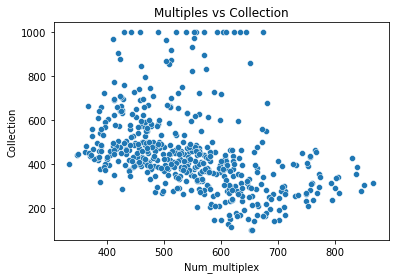

In [52]:
sns.scatterplot(x = "Num_multiplex", y = "Collection", data = data)
plt.title("Multiples vs Collection")

Text(0.5, 1.0, 'Budget spent vs Collection')

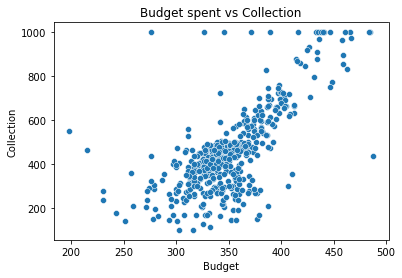

In [53]:
sns.scatterplot(x = "Budget", y = "Collection", data = data)
plt.title("Budget spent vs Collection")

Text(0.5, 1.0, 'Critic Rating vs Collection')

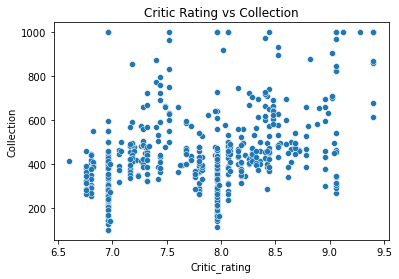

In [54]:
sns.scatterplot(x = "Critic_rating", y = "Collection", data = data)
plt.title("Critic Rating vs Collection")

In [55]:
data.corr()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection
Marketing expense,1.000000,0.406583,-0.420972,-0.219247,0.352734,0.380050,0.379813,0.380069,0.376462,-0.184985,-0.443457,0.025694,0.013518,0.059204,0.383298,-0.389582
Production expense,0.406583,1.000000,-0.763651,-0.391676,0.644779,0.706481,0.707956,0.707566,0.705819,-0.251565,-0.591657,0.015773,-0.000839,0.055810,0.707559,-0.484754
Multiplex coverage,-0.420972,-0.763651,1.000000,0.302188,-0.731470,-0.768589,-0.769724,-0.769157,-0.764873,0.145555,0.581386,0.035515,0.004882,-0.092104,-0.915495,0.429300
Budget,-0.219247,-0.391676,0.302188,1.000000,-0.240265,-0.208464,-0.203981,-0.201907,-0.205397,0.232361,0.602536,0.040439,0.030674,-0.064694,-0.282796,0.696304
Movie_length,0.352734,0.644779,-0.731470,-0.240265,1.000000,0.746904,0.746493,0.747021,0.746707,-0.217830,-0.589318,-0.019820,0.009380,0.075198,0.673896,-0.377999
Lead_ Actor_Rating,0.380050,0.706481,-0.768589,-0.208464,0.746904,1.000000,0.997905,0.997735,0.994073,-0.169978,-0.490267,0.038050,0.014463,0.036794,0.706331,-0.251355
Lead_Actress_rating,0.379813,0.707956,-0.769724,-0.203981,0.746493,0.997905,1.000000,0.998097,0.994003,-0.165992,-0.487536,0.037975,0.010239,0.038005,0.708257,-0.249459
Director_rating,0.380069,0.707566,-0.769157,-0.201907,0.747021,0.997735,0.998097,1.000000,0.994126,-0.166638,-0.486452,0.035881,0.010077,0.041470,0.709364,-0.246650
Producer_rating,0.376462,0.705819,-0.764873,-0.205397,0.746707,0.994073,0.994003,0.994126,1.000000,-0.167003,-0.487911,0.028695,0.005850,0.032542,0.703518,-0.248200
Critic_rating,-0.184985,-0.251565,0.145555,0.232361,-0.217830,-0.169978,-0.165992,-0.166638,-0.167003,1.000000,0.228641,-0.014762,-0.023655,-0.049797,-0.128769,0.341288


Dummy variable creation (for 3D available and Genre)

In [56]:
data.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,365.24125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,480.0
1,20.5462,69.14,0.531,356.68655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,432.0
2,20.5458,69.14,0.531,399.12675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,694.0
3,20.6474,59.36,0.542,388.73890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,668.0
4,21.3810,59.36,0.542,397.01585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,724.0


In [57]:
data = pd.get_dummies(data,columns = ["3D_available","Genre"])

In [58]:
data.head(20)

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_NO,3D_available_YES,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,365.24125,138.7,7.825,8.095,7.910,7.995,7.94,...,223.840,23,494,480.0,0,1,0,0,0,1
1,20.5462,69.14,0.531,356.68655,152.4,7.505,7.650,7.440,7.470,7.44,...,243.456,42,462,432.0,1,0,0,0,1,0
2,20.5458,69.14,0.531,399.12675,134.6,7.485,7.570,7.495,7.515,7.44,...,2022.400,38,458,694.0,1,0,0,1,0,0
3,20.6474,59.36,0.542,388.73890,119.3,6.895,7.035,6.920,7.020,8.26,...,225.344,45,472,668.0,0,1,0,0,1,0
4,21.3810,59.36,0.542,397.01585,127.7,6.920,7.070,6.815,7.070,8.26,...,225.792,55,395,724.0,1,0,0,0,1,0
5,20.5970,59.36,0.542,357.18650,132.2,6.890,7.100,6.885,7.005,7.26,...,284.592,53,460,574.0,0,1,0,1,0,0
6,21.7658,70.74,0.476,333.96660,140.1,7.065,7.265,7.150,7.400,8.96,...,243.664,41,522,458.0,0,1,0,0,0,1
7,22.8910,70.74,0.476,342.85460,169.6,6.980,7.075,6.875,7.170,7.96,...,243.536,56,571,442.0,1,0,0,0,1,0
8,24.2248,70.74,0.476,312.80205,173.5,6.910,7.075,6.850,7.000,7.96,...,242.640,55,564,330.0,0,1,0,1,0,0
9,23.4008,70.74,0.476,333.52220,159.4,6.665,6.725,6.575,6.855,7.96,...,283.024,45,508,378.0,0,1,0,0,0,1


In [59]:
# removing columns which is not needed (Multiplex coverage,Num_multiplex,3D_available_NO)
data=data.drop(["Multiplex coverage","Time_taken","Num_multiplex","3D_available_NO"],axis =1)

In [60]:
data.shape

(506, 18)

VARIABLE SEPERATION

In [61]:
x = data.loc[:, data.columns!="Collection"]

In [62]:
x.head()

,Marketing expense,Production expense,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Twitter_hastags,Avg_age_actors,3D_available_YES,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,365.24125,138.7,7.825,8.095,7.910,7.995,7.94,527367,223.840,23,1,0,0,0,1
1,20.5462,69.14,356.68655,152.4,7.505,7.650,7.440,7.470,7.44,494055,243.456,42,0,0,0,1,0
2,20.5458,69.14,399.12675,134.6,7.485,7.570,7.495,7.515,7.44,547051,2022.400,38,0,0,1,0,0
3,20.6474,59.36,388.73890,119.3,6.895,7.035,6.920,7.020,8.26,516279,225.344,45,1,0,0,1,0
4,21.3810,59.36,397.01585,127.7,6.920,7.070,6.815,7.070,8.26,531448,225.792,55,0,0,0,1,0


In [63]:
y = data["Collection"]

In [64]:
y.head()

0    480.0
1    432.0
2    694.0
3    668.0
4    724.0
Name: Collection, dtype: float64

In [65]:
print(x.shape)
print(y.shape)


(506, 17)
(506,)


TEST TRAIN SPLIT

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [68]:
print(x_train.shape)
print(x_test.shape)


(404, 17)
(102, 17)


DECISION TREE REGRESSOR

In [69]:
from sklearn.tree import DecisionTreeRegressor

In [70]:
model = DecisionTreeRegressor(max_depth=3)

In [71]:
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [72]:
pred = model.predict(x_test)

In [73]:
print(pred)

[ 461.87356322 1000.          461.87356322  235.14285714  461.87356322
  461.87356322  461.87356322  461.87356322  461.87356322  461.87356322
  235.14285714  235.14285714  235.14285714  235.14285714  918.60869565
  651.83333333  461.87356322  651.83333333  461.87356322  461.87356322
  461.87356322  461.87356322  461.87356322  461.87356322  461.87356322
  461.87356322  461.87356322  351.37777778  918.60869565  351.37777778
  235.14285714  235.14285714  461.87356322  461.87356322  461.87356322
  351.37777778  235.14285714 1000.          235.14285714  235.14285714
  461.87356322  461.87356322  461.87356322  235.14285714  461.87356322
  461.87356322  351.37777778  351.37777778  351.37777778  461.87356322
  351.37777778  351.37777778  461.87356322  918.60869565  351.37777778
  351.37777778  461.87356322  461.87356322 1000.          351.37777778
  461.87356322  461.87356322  651.83333333  461.87356322  235.14285714
  461.87356322  351.37777778  351.37777778  288.          461.87356322
  461.

In [74]:
from sklearn.metrics import mean_squared_error, r2_score

In [75]:
mean_squared_error(y_test,pred)

11707.721627161309

In [88]:
r2s=r2_score(y_test,pred)
print(r2s)

0.6363210381227449


In [89]:

r2s = str(round(r2s,2))


In [90]:
print(r2s)

0.64


In [98]:
a = (1-0.64)*(505)
print(a)
b= 506-17-1
print(b)
c=a/b
print(c)
adj_r2 = 1-c
print(adj_r2)

181.79999999999998
488
0.37254098360655735
0.6274590163934426


In [101]:
print(" ACCURACY : %.2f"%adj_r2)

 ACCURACY : 0.63


PLOTTING REGRESSTION TREE

In [102]:
from sklearn import tree
dot_data = tree.export_graphviz(model,out_file = None)

In [103]:
from IPython.display import Image

In [104]:
import pydotplus

In [105]:
graph = pydotplus.graph_from_dot_data(dot_data)

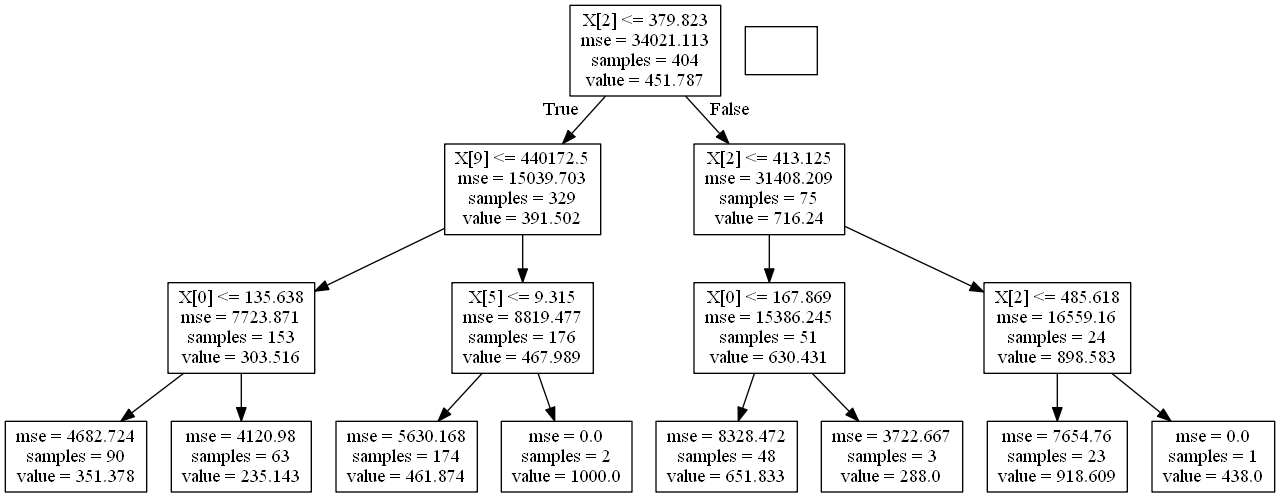

In [106]:
Image(graph.create_png())

IMPLEMENTATION

In [156]:
data.head(1)

,Marketing expense,Production expense,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Twitter_hastags,Avg_age_actors,Collection,3D_available_YES,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,365.24125,138.7,7.825,8.095,7.91,7.995,7.94,527367,223.84,23,480.0,1,0,0,0,1


In [157]:
x_train.head(1)

,Marketing expense,Production expense,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Twitter_hastags,Avg_age_actors,3D_available_YES,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller
220,27.1618,67.4,386.12805,162.0,8.485,8.64,8.485,8.67,8.52,480270,224.272,23,0,0,0,0,1


In [166]:
def prediction_calculator(n):
    for i in range(n):
        print("\n ENTER THE INPUTS %s st movie: "%(i+1))
        ME=input("\nMarketing expense (in crores): ")
        PE=input("Production expense (in crores): ")
        Budget=input("Budget (in crores): ")
        ML=input("Movie Length (in mins): ")
        Act_rate=input("Lead Actor rating (1-10 imdb scale) : ")
        Actr_rate=input("Lead Actress rating (1-10 imdb scale): ")
        DR=input("Director rating (1-10 imdb scale) : ")
        PR=input("Producer rating (1-10 imdb scale) : ")
        CR=input("Critic rating (1-10 imdb critic rating scale) : ")
        TV=input("Trailer views (in lakhs): ")
        TH=input("Twitter hashtags : ")
        Avg_act=input("Average actors : ")
        three_d=input("3 D (1-yes/0-no): ")
        genre = input("Genre (action/comedy/drama/thriller) : ")
        if(genre=="action"):
            ga=1
            gc=0
            gt=0
            gd=0
        elif(genre=="comdey"):
            ga=0
            gc=1
            gt=0
            gd=0
        elif(genre=="drama"):
            ga=0
            gc=0
            gt=0
            gd=1
        else:
            ga=0
            gc=0
            gt=1
            gd=0

 
        c=np.array([ME,PE,Budget,ML,Act_rate,Actr_rate,DR,PR,CR,TV,TH,Avg_act,three_d,ga,gc,gd,gt])
        c_rs=c.reshape(1,-1)
        pred=model.predict(c_rs)
        print("COLLECTION  (in crores): ",pred)
 

In [169]:
use_case=int(input("\n ENTER NUMBER OF USE CASES : "))
prediction_calculator(use_case)


 ENTER NUMBER OF USE CASES : 1

 ENTER THE INPUTS 1 st movie: 

Marketing expense (in crores): 21
Production expense (in crores): 34
Budget (in crores): 120
Movie Length (in mins): 120.45
Lead Actor rating (1-10 imdb scale) : 8.7
Lead Actress rating (1-10 imdb scale): 8.2
Director rating (1-10 imdb scale) : 8.3
Producer rating (1-10 imdb scale) : 8.0
Critic rating (1-10 imdb critic rating scale) : 9.5
Trailer views (in lakhs): 400023
Twitter hashtags : 234
Average actors : 31
3 D (1-yes/0-no): 1
Genre (action/comedy/drama/thriller) : drama
COLLECTION  (in crores):  [351.37777778]
